# Exploratory Data Analysis on Churn Dataset


## Importing Libraries


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset
df = pd.read_csv('Abandono_clientes.csv')

# Dropping unnecessary columns for the EDA
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for null values in each column
print("\nNull Values in Each Column:")
print(df.isnull().sum())



Null Values in Each Column:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Not even a single null value, that's good.


### What is Churn?
First of all, I want to explain what is churn.
According to RD Station (Marketing Company)<a name="cite_ref-1"></a>[<sup>[1]</sup>](https://www.rdstation.com/blog/marketing/o-que-e-churn/), Churn is a metric that indicates the number of customers who exited a company or a service in a given period of time. Churn rate can be an indicator of how satisfied customers are with a product or service. An increase in churn rate almost always suggests problems.

Now that we understand what is Churn, let's understand more our data.


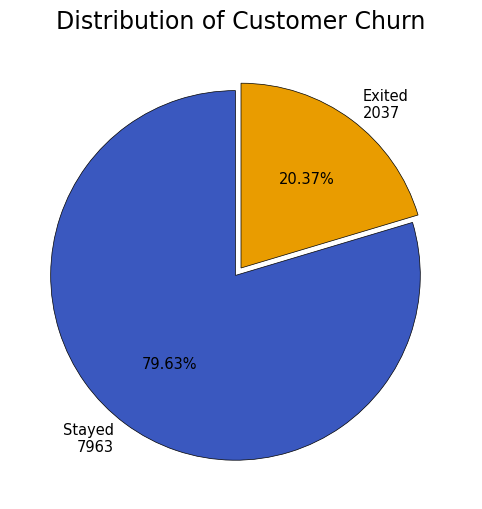

In [28]:
# Create a pie chart for the 'Exited' column distribution
plt.figure(figsize=(8, 6))
exited_counts = df['Exited'].value_counts()
labels = ['Stayed', 'Exited']
values = exited_counts.values
percentages = (values / len(df) * 100).round(2)

plt.pie(values, labels=[f'{labels[i]}\n{values[i]}' for i in range(len(labels))], 
        autopct='%1.2f%%', startangle=90, explode=[0.05, 0],
        textprops={'fontsize': 10.5}, colors=['#3a58bf', '#e99c00'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5, 'antialiased': True})
plt.title('Distribution of Customer Churn', fontsize=17)
plt.show()


As we can see, our churn rate is around 20%, which is high and we need to understand how this is happening. Clearly there is a class imbalance, but that's okay.


In [5]:
# Converting Gender column to binary: Male=1, Female=0
df_corr = df.copy()
df_corr['Male'] = np.where(df_corr['Gender'] == 'Male', 1, 0)
df_corr.drop('Gender', axis=1, inplace=True)

# One-hot encoding for Geography column
geography_dummies = pd.get_dummies(df_corr['Geography'], prefix='Geo', dtype=int)
df_corr = pd.concat([df_corr, geography_dummies], axis=1)
df_corr.drop('Geography', axis=1, inplace=True)


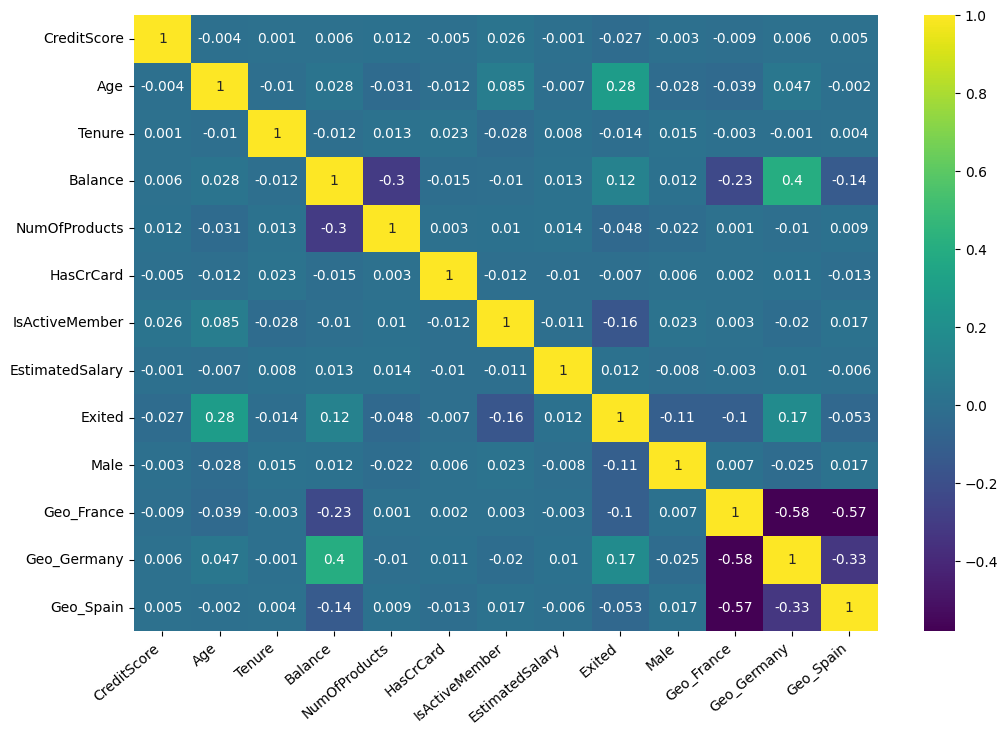

In [6]:
# Plotting a heatmap of the correlations looking for relations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr().round(3),
            annot=True,
            cmap='viridis')
plt.xticks(rotation=40, ha='right');

* An important point that we can observe is that the variable Exited (our dependent variable) has a weak positive correlation with Age (**0.28**), that is, as the person ages, it correlates with their exit.
* Apparently the country with the highest Balance is Germany, since the correlation between the two variables is moderate (**0.4**) and it was showed previously
* Exited has very weak correlation between Genders (**-0.11**, as is negative, Exited increases and Male decreases, it means the Female has more chances of leaving)



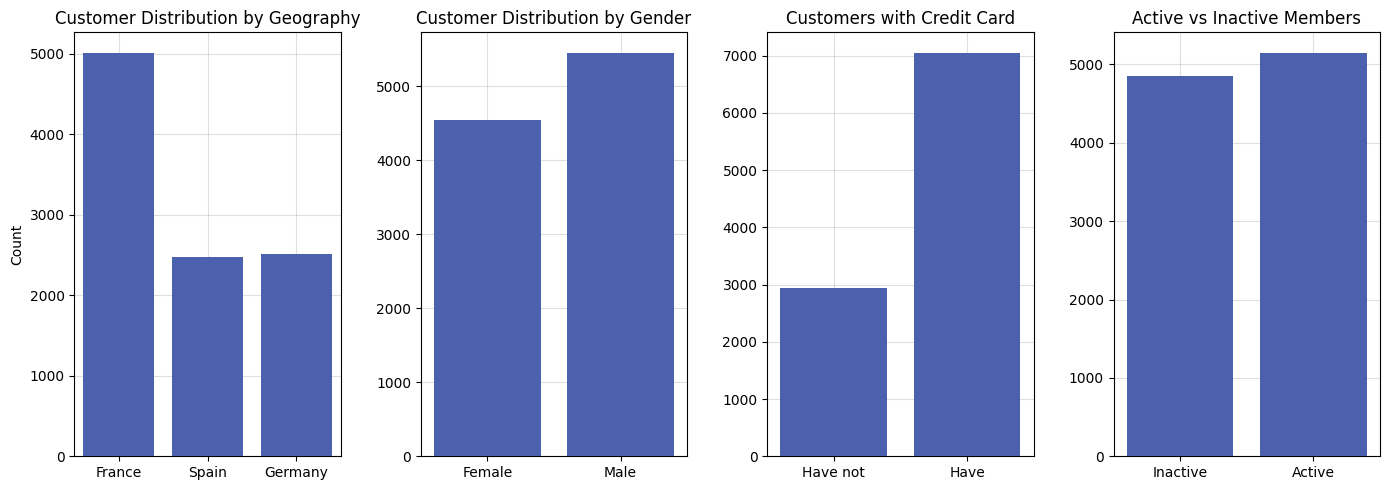

In [48]:
# Create a figure with subplots for categorical variables
plt.figure(figsize=(14, 5))

# Geography distribution
plt.subplot(141)
sns.countplot(data=df, x='Geography', color='#3a58bf', zorder=10)
plt.title('Customer Distribution by Geography')
plt.xlabel('')
plt.ylabel('Count')
plt.grid(zorder=10, alpha=.4)
plt.xticks(rotation=0)

# Gender distribution 
plt.subplot(142)
sns.countplot(data=df, x='Gender', color='#3a58bf', zorder=10)
plt.title('Customer Distribution by Gender')
plt.xlabel('')
plt.ylabel('')
plt.grid(zorder=10, alpha=.4)

# HasCrCard distribution
plt.subplot(143)
sns.countplot(data=df, x='HasCrCard', color='#3a58bf', zorder=10)
plt.title('Customers with Credit Card')
plt.xlabel('')
plt.ylabel('')
plt.grid(zorder=10, alpha=.4)
plt.xticks([0, 1], ['Have not', 'Have'])

# IsActiveMember distribution
plt.subplot(144)
sns.countplot(data=df, x='IsActiveMember', color='#3a58bf', zorder=10)
plt.title('Active vs Inactive Members')
plt.xlabel('')
plt.ylabel('')
plt.grid(zorder=10, alpha=.4)
plt.xticks([0, 1], ['Inactive', 'Active'])

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


* Most part of the clients are from France
* The distribution between Male and Female is balanced
* More than 70& of the customers have Credit Card
* Active and Inactive members are very balanced

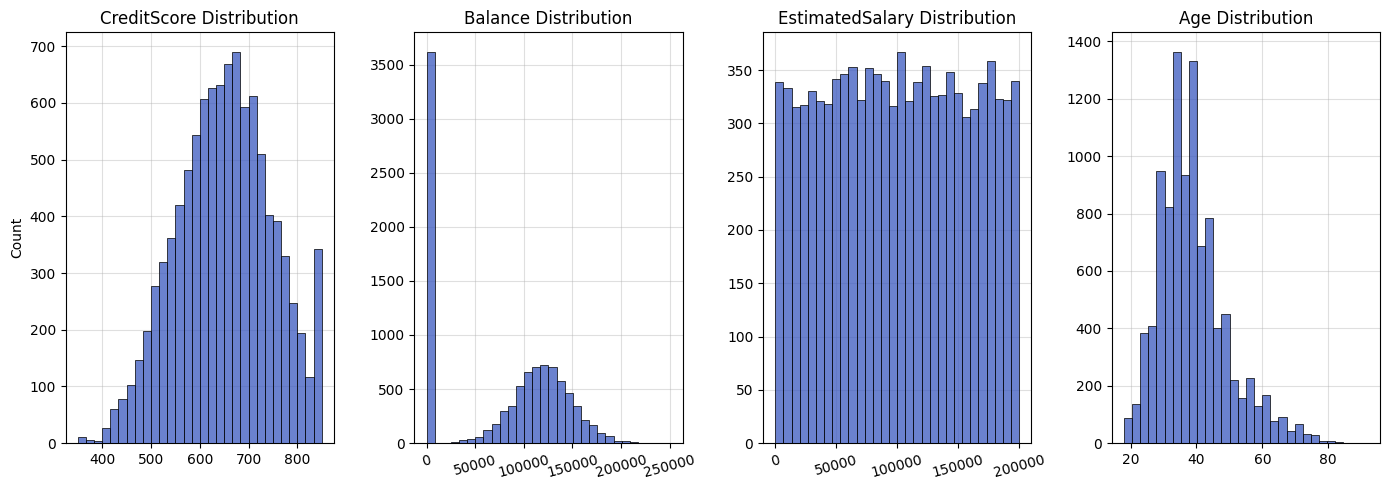

In [56]:
plt.figure(figsize=(14, 5))

# CreditScore
plt.subplot(141)
sns.histplot(data=df, x='CreditScore', color='#3a58bf', bins=30, zorder=10)
plt.title('CreditScore Distribution')
plt.xlabel('')
plt.grid(alpha=.4, zorder=-10)

# Balance 
plt.subplot(142)
sns.histplot(data=df, x='Balance', color='#3a58bf', bins=30, zorder=10)
plt.title('Balance Distribution')
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

# EstimatedSalary
plt.subplot(143)
sns.histplot(data=df, x='EstimatedSalary', color='#3a58bf', bins=30, zorder=10)
plt.title('EstimatedSalary Distribution')
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

# Age
plt.subplot(144)
sns.histplot(data=df, x='Age', color='#3a58bf', bins=30, zorder=10)
plt.title('Age Distribution')
plt.xlabel('')
plt.ylabel('')
plt.grid(alpha=.4, zorder=-10)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()


In [60]:
df[['CreditScore', 'Balance', 'EstimatedSalary', 'Age']].describe()

,CreditScore,Balance,EstimatedSalary,Age
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,100090.239881,38.921800
std,96.653299,62397.405202,57510.492818,10.487806
min,350.000000,0.000000,11.580000,18.000000
25%,584.000000,0.000000,51002.110000,32.000000
50%,652.000000,97198.540000,100193.915000,37.000000
75%,718.000000,127644.240000,149388.247500,44.000000
max,850.000000,250898.090000,199992.480000,92.000000


* Credit Score Distribution:
  * The distribution is approximately normal, with a peak close to 700, so the biggest part of the clients has a good CreditScore
  * Outliers seem to exist at both lower and higher extremes, particularly near 400 and above 800.
* Balance Distribuion:
  * The significant spike at 0 indicates a huge number of customers with no balance.
  * The remaining balance values form a roughly normal distribution, centered near 125,000.
* Estimated Salary Distribution:
  * The distribution is uniform, with nearly equal frequency across the range of salaries.
  * There are no visible outliers or skewness in this data.

### Investigating the behavior of variables across countries


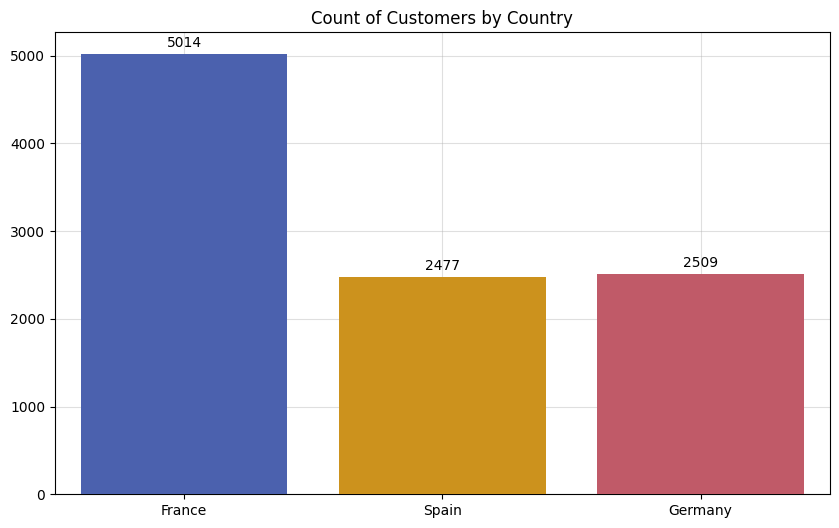

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geography', zorder=10, palette=['#3a58bf', '#e99c00', '#d1495b'])
plt.title('Count of Customers by Country')
plt.grid(alpha=.4, zorder=-10)
plt.xlabel('')
plt.ylabel('')

for i in plt.gca().containers:
    plt.bar_label(i, fmt='%.0f', padding=3)

plt.show()


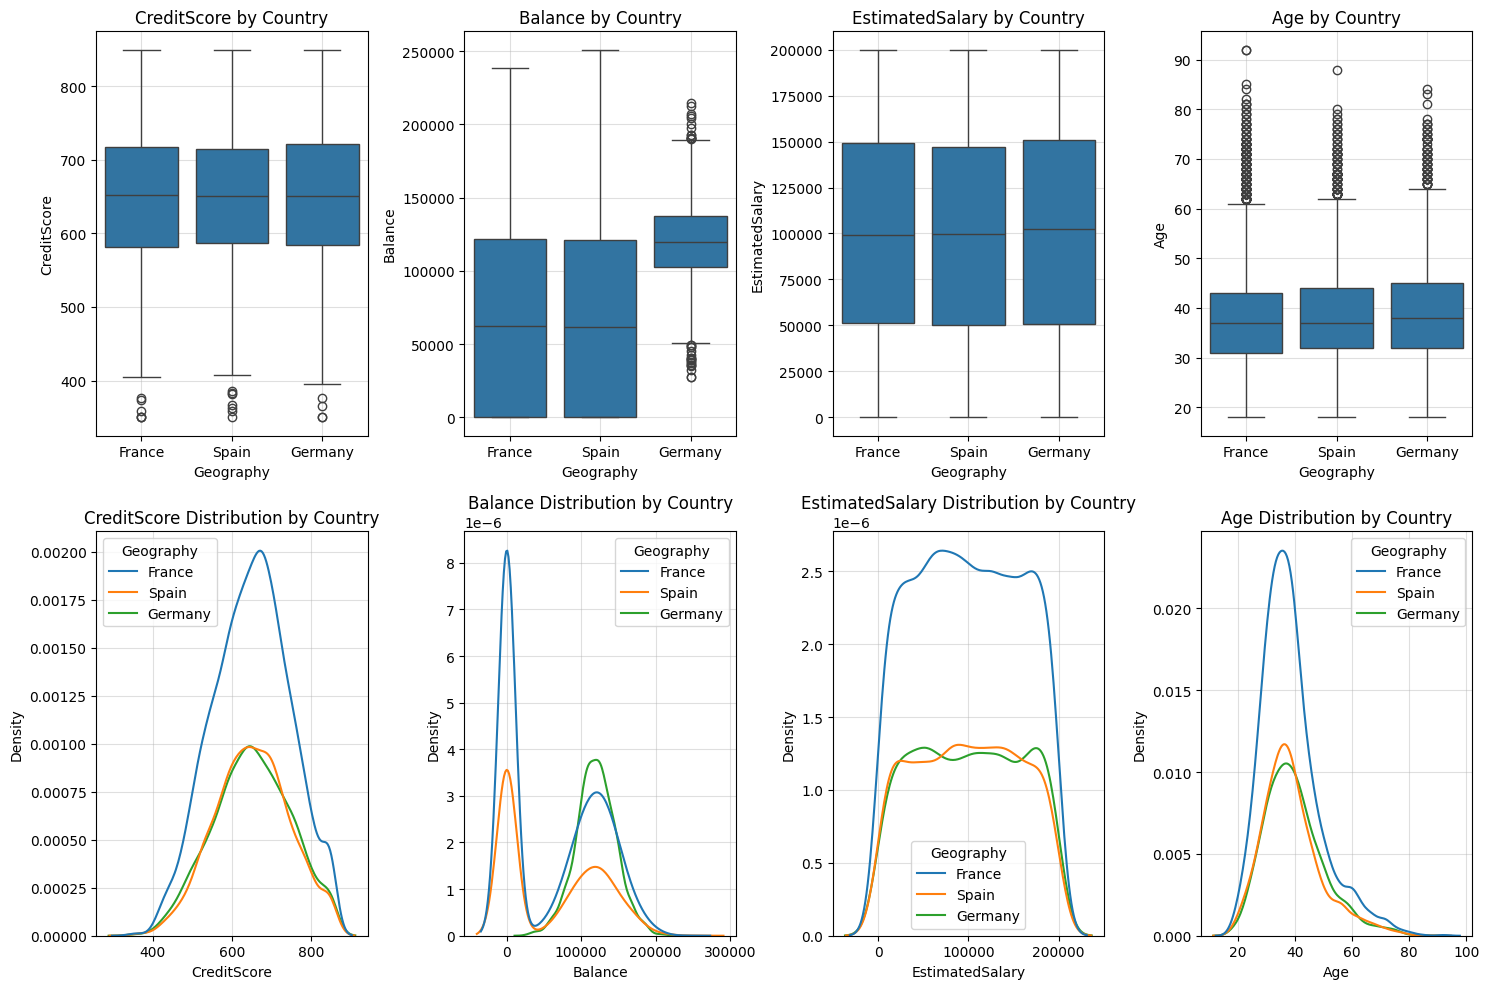

In [15]:
plt.figure(figsize=(15, 10))

# CreditScore
plt.subplot(241)
sns.boxplot(data=df, x='Geography', y='CreditScore')
plt.title('CreditScore by Country')
plt.grid(alpha=.4)

plt.subplot(245)
sns.kdeplot(data=df, x='CreditScore', hue='Geography')
plt.title('CreditScore Distribution by Country')
plt.grid(alpha=.4)

# Balance
plt.subplot(242)
sns.boxplot(data=df, x='Geography', y='Balance')
plt.title('Balance by Country')
plt.grid(alpha=.4)

plt.subplot(246)
sns.kdeplot(data=df, x='Balance', hue='Geography')
plt.title('Balance Distribution by Country')
plt.grid(alpha=.4)

# EstimatedSalary
plt.subplot(243)
sns.boxplot(data=df, x='Geography', y='EstimatedSalary')
plt.title('EstimatedSalary by Country')
plt.grid(alpha=.4)

plt.subplot(247)
sns.kdeplot(data=df, x='EstimatedSalary', hue='Geography')
plt.title('EstimatedSalary Distribution by Country')
plt.grid(alpha=.4)

# Age
plt.subplot(244)
sns.boxplot(data=df, x='Geography', y='Age')
plt.title('Age by Country')
plt.grid(alpha=.4)

plt.subplot(248)
sns.kdeplot(data=df, x='Age', hue='Geography')
plt.title('Age Distribution by Country')
plt.grid(alpha=.4)

plt.tight_layout()
plt.show()


In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
